# Calculation of the Half-Life of a Mean-Reverting Time Series

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import coint

In [5]:
from statsmodels.api import OLS

In [6]:
df1=pd.read_excel('GLD.xls')

In [7]:
df2=pd.read_excel('GDX.xls')

In [8]:
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.sort_index(inplace=True)

## Run cointegration (Engle-Granger) test

In [11]:
coint_t, pvalue, crit_value=coint(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [12]:
(coint_t, pvalue, crit_value) # abs(t-stat) > critical value at 95%. pvalue says probability of null hypothesis (of no cointegration) is only 1.8%

(-3.6981160763300593,
 0.018427835409537425,
 array([-3.92518794, -3.35208799, -3.05551324]))

## Determine hedge ratio

In [13]:
model=OLS(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [14]:
results=model.fit()

In [15]:
hedgeRatio=results.params

In [16]:
hedgeRatio

Adj Close_GDX    1.639523
dtype: float64

##  z = GLD - hedgeRatio*GDX

In [17]:
z=df['Adj Close_GLD']-hedgeRatio[0]*df['Adj Close_GDX']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


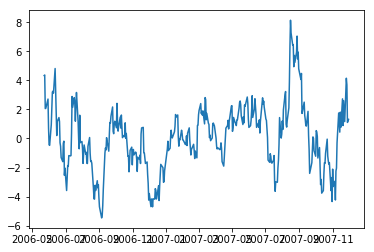

In [18]:
plt.plot(z)

In [19]:
prevz=z.shift()

In [20]:
dz=z-prevz

In [21]:
dz=dz[1:,]

In [22]:
prevz=prevz[1:,]

In [23]:
model2=OLS(dz, prevz-np.mean(prevz))

In [24]:
results2=model2.fit()

In [25]:
theta=results2.params

In [26]:
theta

x1   -0.088423
dtype: float64

In [27]:
halflife=-np.log(2)/theta

In [28]:
halflife

x1    7.839031
dtype: float64